<a href="https://colab.research.google.com/github/luluqinqin/CloudComputing/blob/main/TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### TensorFlow


In [ ]:
%tensorflow_version 2.x

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
print(tf.version)

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.7/dist-packages/tensorflow/_api/v2/version/__init__.py'>


### Tensor Shape

In [ ]:
# RANK - the number of dimesions
rank1_tensor = tf.Variable(['1','2','3'],tf.string)  # rank 1 tensor, 1 dimension
rank2_tensor = tf.Variable([['1','2','3'],['3','4','5']],tf.string)  # rank 2 tensor, 2 dimensions 
rank2_tensor

<tf.Variable 'Variable:0' shape=(2, 3) dtype=string, numpy=
array([[b'1', b'2', b'3'],
       [b'3', b'4', b'5']], dtype=object)>

In [ ]:
rank2_tensor.shape

TensorShape([2, 3])

In [ ]:
tensor1 = tf.ones([1,2,3])  #crate a shape of [1,2,3] tensor full of ones, 1 interior list, 2 lists inside the bigger list, and each list has 3 elements
print(tensor1)

tf.Tensor(
[[[1. 1. 1.]
  [1. 1. 1.]]], shape=(1, 2, 3), dtype=float32)


In [ ]:
tensor2 = tf.reshape(tensor1, [2,3,1]) #2 list, 3 smaller list inside of each 2 lists, and 1 element in each 
print(tensor2)

tf.Tensor(
[[[1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]]], shape=(2, 3, 1), dtype=float32)


In [ ]:
tensor3 = tf.reshape(tensor2,[3, -1])  # -1 is to tell tensor to calculate the size of dimensions (num of elements) within 3 lists
print(tensor3)

tf.Tensor(
[[1. 1.]
 [1. 1.]
 [1. 1.]], shape=(3, 2), dtype=float32)


### Tensor Type

In [ ]:
# Variable - Muttable (changable)
# Constant  - immutable
# Placeholder - immutable
# SparseTensor - immutable 

### Evaluate Tensor

In [ ]:
# with tf.Session() as sess:
#   (whatever tensor name).eval()

SyntaxError: ignored

### PRACTICE

In [ ]:
t = tf.zeros([5,2,2])
t2 = tf.reshape(t, [5,-1])
t2

# **TensorFlow CORE Algorithm**

# Linar Regression

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
x = [1,2,3,4,5]
y = [3,4,8,15,20]
plt.plot(x,y,'ro')
plt.axis([0,6,0,26])

In [ ]:
!pip install -q sklearn

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib
import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf

In [ ]:
dftrain = pd.read_csv('http://storage.googleapis.com/tf-datasets/titanic/train.csv')
dftest = pd.read_csv('http://storage.googleapis.com/tf-datasets/titanic/eval.csv')

In [ ]:
dftrain.head()
dftrain.columns
dftest.shape

In [ ]:
y_train = dftrain.pop('survived')
print(y_train)

In [ ]:
y_test = dftest.pop('survived')
print(y_test)

In [ ]:
dftrain.describe()

In [ ]:
dftrain.shape

In [ ]:
dftrain.age.hist(bins=20)

In [ ]:
dftrain.sex.value_counts().plot(kind='barh')

In [ ]:
dftrain['class'].value_counts().plot(kind = 'barh')

In [ ]:
dftrain.groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')

### Seperate Numerical & Categorical Data

In [ ]:
CAT_COL = ['sex','n_siblings_spouses','parch','class','deck','embark_town','alone']
NUM_COL = ['age','fare']

In [ ]:
feature_columns = []
for i in CAT_COL:
  level = dftrain[i].unique()  # get the unique value (e.g., female, male) from the categorical column
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(i, level))  

In [ ]:
for i in NUM_COL:
  feature_columns.append(tf.feature_column.numeric_column(i,dtype = tf.float32))

In [ ]:
print(feature_columns)

### MODEL

In [ ]:
# LOAD DATA IN BATCHES (small batches 32)
# EPOCHS - a stream of our entire dataset; num of epochs is the amount of times our model will see the entire datatset;
# we use multiple epochs in hope that after seeeing the same data multiple times the model will better determine how to estimate it
# e.g, if we have 10 epochs, model will see the same data for 10 times
# since we need to feed our data in batches and multiple times we need to create INPUT FUNCTION. the input function will covert dataset into batches at each epochs


##### INPUT FUNCTION

In [ ]:
# TensorFlow model requires the data we process come in as a tf.data.Dataset object\\
# tf.data.Dataset DEFINE AN INPUT FUNCTION how to break data into epochs and batches to fit the model
# It's the code can be adapted to any kind of data

In [ ]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):  # shuffle is to shuffle the data and mix it up
  def input_function():  #inner function will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))    #create tf.data.Dataset object with data and its lable
    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)   # take data and break into num_batch (num of blocks) to pass to modle and repeat num_epochs
    return ds
  return input_function

train_input_fn = make_input_fn(dftrain, y_train)
test_input_fn = make_input_fn(dftest, y_test, num_epochs=1, shuffle=False)   # TEST data NO need to shuffle cuz we don't need to train it



##### CREATING MODELS

In [ ]:
# Activate Linear ESTIMATOR
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)

In [ ]:
# TRAIN MODEL
linear_est.train(train_input_fn)
result = linear_est.evaluate(test_input_fn)
clear_output()
print(result['accuracy'])
print(result)

In [ ]:
y_pred = list(linear_est.predict(test_input_fn))
clear_output()
print(y_pred)
clear_output()

In [ ]:
print(y_pred[0])  # review the first prediction
print(y_pred[0]['probabilities'][1]) # get probability of survived
print(y_pred[0]['probabilities'][0]) # get probability of NOT survived

In [ ]:
# check back to individual data of the first person
print(dftest.loc[0])
print(y_test.loc[0])   # actual survive data
print(y_pred[0]['probabilities'][1])   # predicted survive data

In [ ]:
for i in y_pred:
  print(i['probabilities'][1])
clear_output()

In [ ]:
for i in range(0,len(y_pred)):
  print(y_test[i])
  print(y_pred[i]['probabilities'][1])
clear_output()

# **CLASSIFICATION**

In [ ]:
COLNAMES = ['SepalLength','SepalWidth','PetalLength','PetalWidth','Species']
SPECIES = ['Setosa','Versicolor','Virginica']

In [ ]:
train_path = tf.keras.utils.get_file(
    'iris_training.csv',"https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"
)
test_path = tf.keras.utils.get_file(
    'iris_test.csv',"https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"
)

In [ ]:
train = pd.read_csv(train_path, names = COLNAMES, header=0)
test = pd.read_csv(test_path, names = COLNAMES, header=0)

In [ ]:
train.shape
test.shape
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [ ]:
y_train = train.pop('Species')
y_test = test.pop('Species')

In [ ]:
y_train.head()
y_test.head()

0    1
1    2
2    0
3    1
4    1
Name: Species, dtype: int64

In [ ]:
# USE A CREATED INPUT FUNCTION
def input_fn(features, labels, training=True, batch_size = 256):  
  
  #Convert the input to a Dataset
  dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))    #create tf.data.Dataset object with data and its lable
  
  # Shuffle and repeat if you are in training mode
  if training:
    dataset = dataset.shuffle(1000).repeat()
  
  return dataset.batch(batch_size)


In [ ]:
# FEATURE Columns describe how to use input
my_feature_columns = []
for i in train.columns:
  my_feature_columns.append(tf.feature_column.numeric_column(key=i))
my_feature_columns

[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

## CLASSIFICATION MODELS
### DNNClassifier (Deep Neural Network)
### LinearClassifier

In [ ]:
# ESTIMATOR
# Build a DNN with 2 hidden layers with 30 and 10 hideen nodes each 
classifier = tf.estimator.DNNClassifier(
    feature_columns = my_feature_columns,
    hidden_units=[30,10],
    n_classes=3  # because DV has 3 classes
)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpkvelh9o9', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [ ]:
# lambda function example
# x = lambda: print("hi")    # lambda is a function, is inside of the function of x(), when call x(), return with lambda function
# x()

In [ ]:
# TRAINING
classifier.train(
    input_fn = lambda: input_fn(train, y_train, training=True), steps=5000     # Using lambda function here because we did not embed the function and return the input_fn into another function object
    )
clear_output()
#def input_fn(features, labels, training=True, batch_size = 256):  
  # dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))    
  # if training:
  #   dataset = dataset.shuffle(1000).repeat()
  # return dataset.batch(batch_size)
#return input_fn   # if we have this return function, lambda function is not necessary above

In [ ]:
# Accuracy Evaluation 
eval_result = classifier.evaluate(input_fn = lambda: input_fn(test, y_test, training=False))
print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-02-19T21:23:37
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpkvelh9o9/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.66504s
INFO:tensorflow:Finished evaluation at 2022-02-19-21:23:38
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.93333334, average_loss = 0.40068662, global_step = 5000, loss = 0.40068662
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: /tmp/tmpkvelh9o9/model.ckpt-5000

Test set accuracy: 0.933



In [ ]:
# PREDICTION
def input_fn(features, batch_size=256):
  return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

features = ['SepalLength','SepalWidth','PetalLength','PetalWidth']
predict={}  # create an empty dictionary

for i in features:
  valid = True
  while valid:
    val = input(i + ": ")
    if not val.isdigit(): valid = False
  predict[i] = [float(val)]

predictions = classifier.predict(input_fn = lambda: input_fn(predict))
for i in predictions:
  #print(i)
  class_id = i['class_ids'][0]
  probability = i['probabilities'][class_id]
  print('prediction is "{}" ({:.1f}%)'.format(
      SPECIES[class_id],100 * probability
  ))

SepalLength: 1.2
SepalWidth: 2.1
PetalLength: 2.3
PetalWidth: .3
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpkvelh9o9/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
prediction is "Virginica" (62.5%)


## CLUSTERING
### K-MEANS

##**Hidden Markov Models - Predict future events based on past events**

In [ ]:
# FOR EXAMPLE, predict weather on a given day given the probability of different events occurs
# States is a finite set of states; can be something like hot, cold, blue, red..., are "hidden" (latent) in the model, NOT directly observed
# observation (probability of events occurs at a particular state). e.g., a hot day has 80% chance of being followed by another HOT day
# transition: each state will have a probability defining the likelihood of transition to a different state; e.g., a hot day has 20% chance of being followed by another COLD day

In [ ]:
import tensorflow_probability as tfp
import tensorflow as tf

In [ ]:
# cold day coded 0; hot day coded 1
# first day 80% of chance of being cold
# a cold day has 30% chance being followed by a hot day
# a hot day has 20% chance being followed by a cold day
# cold day ~ N(0,5) iid ; hot day ~ N(15, 10) iid

In [ ]:
tfd = tfp.distributions
initial_distribution = tfd.Categorical(probs=[0.2,0.8])  #2
transition_distribution = tfd.Categorical(probs=[[0.5,0.5],[0.2,0.8]])  #3 & 4
observation_distribution = tfd.Normal(loc=[0.,15.],scale = [5.,10.])  # loc[mean], scale[sd]  # 5

In [ ]:
# Hidden Markov Model - NO training goes into it as probability is fixed
model = tfd.HiddenMarkovModel(
    initial_distribution = initial_distribution,
    transition_distribution = transition_distribution,
    observation_distribution = observation_distribution,
    num_steps = 7   # how many points (days in example) want to predict
)

In [ ]:
mean = model.mean()

# Evaluate the graph from within a session to see value of tensor
with tf.compat.v1.Session() as sess:
  print(mean.numpy())

[11.999999 11.1      10.830001 10.748999 10.724699 10.71741  10.715222]


# Neural Network

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
train_images.shape   # 60000 images with 28 x 28 pixels
type(train_images)
train_images[0,23,23]
train_labels[0:10]
class_name = ['top','pant','pull-over','dress','coat','sandal','shirt','sneaker','bag','boot']

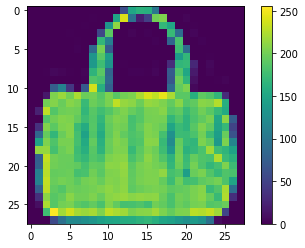

In [ ]:
plt.figure()
plt.imshow(train_images[4000])
plt.colorbar()
plt.show()

### Data Processing - Standardization

In [ ]:
train_images = train_images / 255.0  # to standardize all greyscale pixel value (0-255) to between 0 - 1
test_images = test_images / 255.0

### Keras Sequential Model - 3 Layers - Feedforward Neural Network (left to right)

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = [28,28]),    # input layer - take 28 x 28 matrix to a long 764 records
    keras.layers.Dense(128, activation = 'relu'),   # hidden layer - 128 is arbitrary
    keras.layers.Dense(10, activation = 'softmax')  # output layer - 10 is the number of classes in the DV; softmax for multidimensional DV
])

### Compile Model

In [ ]:
model.compile(
    optimizer = 'adam',  # adma is the function for gradient search
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
# Hyperparameter tuning is to adjust hyper parameters, such as optimizer, loss, activation algorithm, number of neurons, epochs

In [ ]:
model.fit(train_images, train_labels, epochs= 8)

Epoch 1/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2311 - accuracy: 0.9138
Epoch 2/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2248 - accuracy: 0.9166
Epoch 3/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2180 - accuracy: 0.9171
Epoch 4/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2103 - accuracy: 0.9210
Epoch 5/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2049 - accuracy: 0.9222
Epoch 6/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2001 - accuracy: 0.9255
Epoch 7/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1941 - accuracy: 0.9263
Epoch 8/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1896 - accuracy: 0.9290


In [ ]:
test_loss, test_accuracy = model.evaluate(test_images,test_labels, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.3662 - accuracy: 0.8820


In [ ]:
prediction = model.predict(test_images)

In [ ]:
print(prediction[0])  # Get probability in 9 classes
print(np.argmax(prediction[0]))  # get the class with max probability - class 9
print(class_name[np.argmax(prediction[0])])   # get the class name for the class 9

[2.4026070e-10 2.0072536e-14 1.1903358e-15 7.1827560e-14 9.7079783e-12
 7.4718500e-06 2.4727182e-12 1.2781221e-03 2.0331288e-13 9.9871445e-01]
9
boot


pull-over


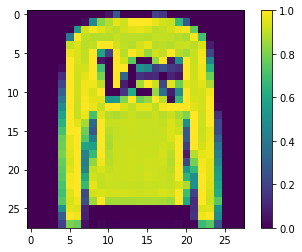

In [ ]:
print(class_name[np.argmax(prediction[1])])
plt.figure()
plt.imshow(test_images[1])
plt.colorbar()
plt.show()

make spaceship
